## Problem Statement

The aim is to build a binary classification model to predict whether a patient has heart disease based on clinical parameters. Each patient is characterized by a set of features, such as blood pressure, cholesterol levels, age, and other health indicators. The model will classify patients into one of two categories:

* Positive: The patient has heart disease.
* Negative: The patient does not have heart disease.

## Data Collection

To address this problem, it is essential to thoroughly analyze the dataset underlying the problem definition. This involves tasks such as sourcing data (if it is not already available), defining relevant parameters, consulting domain experts, and setting clear expectations for the analysis.

The dataset originates from the Cleveland database in the UCI Machine Learning Repository. 
Link:

However, for convenience, a preformatted version has been obtained from Kaggle.
Link: https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

The original Cleveland database includes 76 attributes, but for this project, we will focus on 14 key attributes. These attributes, also known as features, are the variables used to predict the target variable.

In machine learning terminology:

1. Attributes/Features: Also referred to as independent variables, they represent the input data used for predictions.
2. Target Variable: Also called the dependent variable, it is the output we aim to predict.

In this case:
1. Independent Variables: A patient's various medical attributes.
2. Dependent Variable: Whether or not the patient has heart disease.
The independent variables serve as predictors, while the dependent variable is the outcome we want to model.

## 1. Import statments

In [160]:
# Manipulation of Data
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning Models
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## 2. Loading the Datasets
Kaggle Link: https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

In [163]:
import io

with open('heart-disease-dataset.csv', 'r') as file:
    raw_content = file.readlines()

cleaned_content = '\n'.join(line.strip().strip('"') for line in raw_content)

heart_disease_df = pd.read_csv(io.StringIO(cleaned_content), delimiter=',')

heart_disease_df = heart_disease_df.iloc[:, 1:]

heart_disease_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
5,57,male,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,yes
6,56,female,1,140.0,294.0,0,0,153.0,0,1.3,1,0,2,yes
7,44,male,1,120.0,263.0,0,1,173.0,0,0.0,2,0,3,yes
8,52,male,2,172.0,199.0,1,1,162.0,0,0.5,2,0,3,yes
9,57,male,2,150.0,168.0,0,1,174.0,0,1.6,2,0,2,yes


### Conversion of categorical features to numerical features

In [166]:
heart_disease_df['sex'] = heart_disease_df['sex'].apply(lambda x: 1 if x == 'male' else 0)
heart_disease_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,yes
6,56,0,1,140.0,294.0,0,0,153.0,0,1.3,1,0,2,yes
7,44,1,1,120.0,263.0,0,1,173.0,0,0.0,2,0,3,yes
8,52,1,2,172.0,199.0,1,1,162.0,0,0.5,2,0,3,yes
9,57,1,2,150.0,168.0,0,1,174.0,0,1.6,2,0,2,yes


In [168]:
heart_disease_df['target'] = heart_disease_df['target'].apply(lambda x: 1 if x == 'yes' else 0)
heart_disease_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1
6,56,0,1,140.0,294.0,0,0,153.0,0,1.3,1,0,2,1
7,44,1,1,120.0,263.0,0,1,173.0,0,0.0,2,0,3,1
8,52,1,2,172.0,199.0,1,1,162.0,0,0.5,2,0,3,1
9,57,1,2,150.0,168.0,0,1,174.0,0,1.6,2,0,2,1


### Handle Missing Values

In [171]:
heart_disease_df.to_csv('heart_disease_cleaned.csv', index=False)

In [173]:
missing_values_count = heart_disease_df.isnull().sum()
print(missing_values_count)

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [175]:
heart_disease_df['trestbps'] = heart_disease_df['trestbps'].fillna(heart_disease_df['trestbps'].mean())
heart_disease_df['chol'] = heart_disease_df['chol'].fillna(heart_disease_df['chol'].mean())
heart_disease_df['thalach'] = heart_disease_df['thalach'].fillna(heart_disease_df['thalach'].mean())
heart_disease_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,1
5,57,1,0,140.000000,192.0,0,1,148.0,0,0.4,1,0,1,1
6,56,0,1,140.000000,294.0,0,0,153.0,0,1.3,1,0,2,1
7,44,1,1,120.000000,263.0,0,1,173.0,0,0.0,2,0,3,1
8,52,1,2,172.000000,199.0,1,1,162.0,0,0.5,2,0,3,1
9,57,1,2,150.000000,168.0,0,1,174.0,0,1.6,2,0,2,1


In [177]:
heart_disease_df['trestbps'] = heart_disease_df['trestbps'].fillna(0).astype(int)
heart_disease_df['chol'] = heart_disease_df['chol'].fillna(0).astype(int)
heart_disease_df['thalach'] = heart_disease_df['thalach'].fillna(0).astype(int)
heart_disease_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,131,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Exploratory Data Analysis (EDA)

In [180]:
heart_disease_df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [182]:
heart_disease_df.target.value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

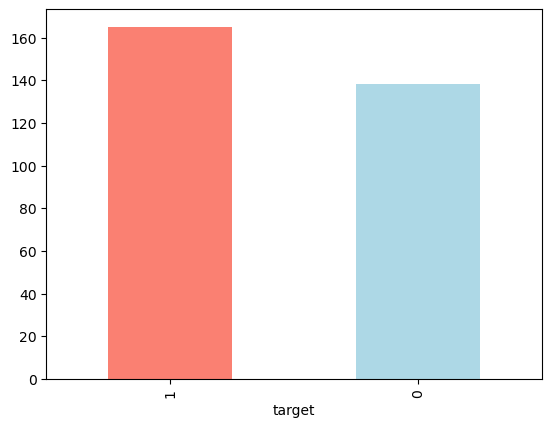

In [184]:
heart_disease_df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [186]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [188]:
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.702970,246.316832,0.148515,0.528053,149.851485,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.512084,51.822276,0.356198,0.525860,22.376395,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Comparing one feature to another

Comparing target v/s sex

In [192]:
heart_disease_df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [194]:
pd.crosstab(index=heart_disease_df.target, columns=heart_disease_df.sex)

sex,0,1
target,,
0,24,114
1,72,93


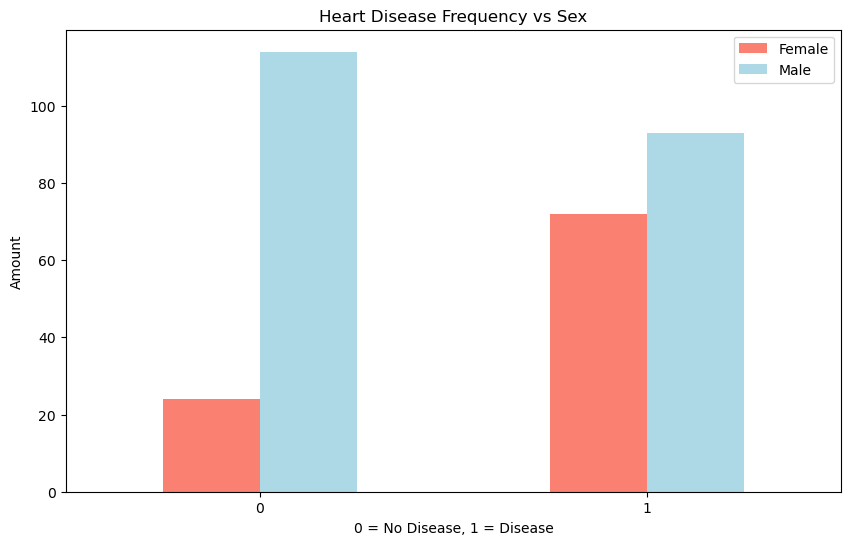

In [196]:
pd.crosstab(heart_disease_df.target, heart_disease_df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

Comparing age and maximum heart rate

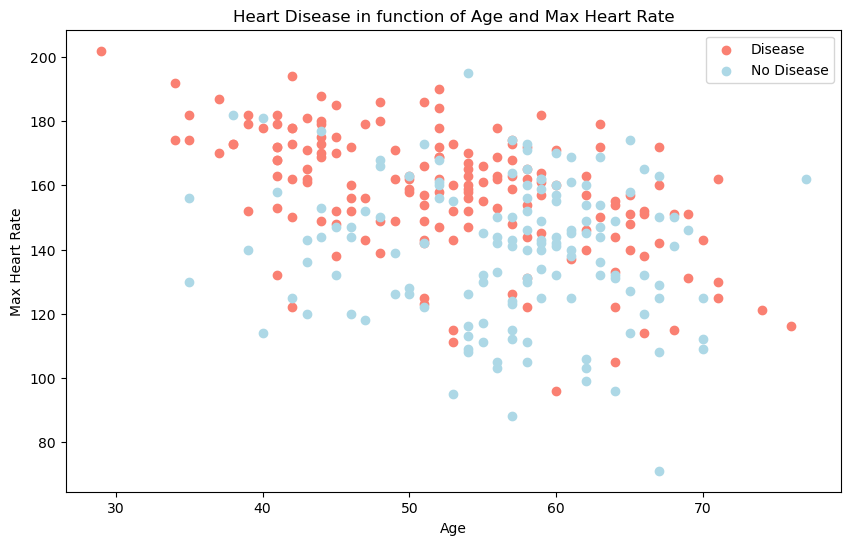

In [199]:
plt.figure(figsize=(10,6))
plt.scatter(heart_disease_df.age[heart_disease_df.target==1], 
            heart_disease_df.thalach[heart_disease_df.target==1], 
            c="salmon") # define it as a scatter figure

plt.scatter(heart_disease_df.age[heart_disease_df.target==0], 
            heart_disease_df.thalach[heart_disease_df.target==0], 
            c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

Age Distribution

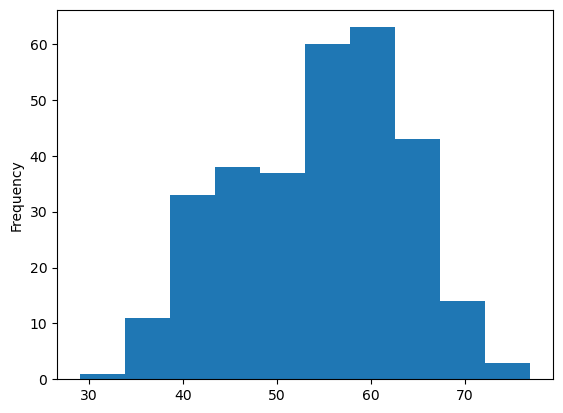

In [202]:
heart_disease_df.age.plot.hist();

Comparing heart disease frequency and chest pain type

In [205]:
pd.crosstab(index=heart_disease_df.cp, columns=heart_disease_df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


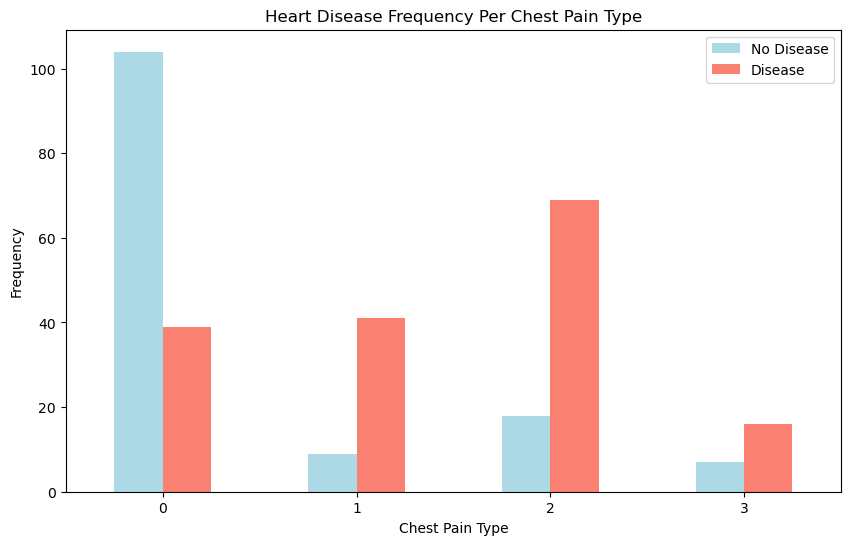

In [207]:
pd.crosstab(heart_disease_df.cp, heart_disease_df.target).plot(kind="bar", 
                                                               figsize=(10,6), 
                                                               color=["lightblue", "salmon"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

Correlation between independent variables

In [210]:
corr_matrix = heart_disease_df.corr()
corr_matrix 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279355,0.213447,0.121308,-0.116211,-0.394509,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.063100,-0.197249,0.045032,-0.058196,-0.050889,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047824,-0.077875,0.094444,0.044421,0.299030,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279355,-0.063100,0.047824,1.000000,0.125072,0.175903,-0.110559,-0.029536,0.069390,0.193659,-0.120914,0.098488,0.060287,-0.141383
chol,0.213447,-0.197249,-0.077875,0.125072,1.000000,0.012870,-0.150147,-0.022903,0.066323,0.053045,-0.003042,0.070793,0.098296,-0.086369
fbs,0.121308,0.045032,0.094444,0.175903,0.012870,1.000000,-0.084189,0.001115,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.110559,-0.150147,-0.084189,1.000000,0.036797,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.394509,-0.050889,0.299030,-0.029536,-0.022903,0.001115,0.036797,1.000000,-0.394144,-0.345063,0.378212,-0.207683,-0.105108,0.409825
exang,0.096801,0.141664,-0.394280,0.069390,0.066323,0.025665,-0.070733,-0.394144,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193659,0.053045,0.005747,-0.058770,-0.345063,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


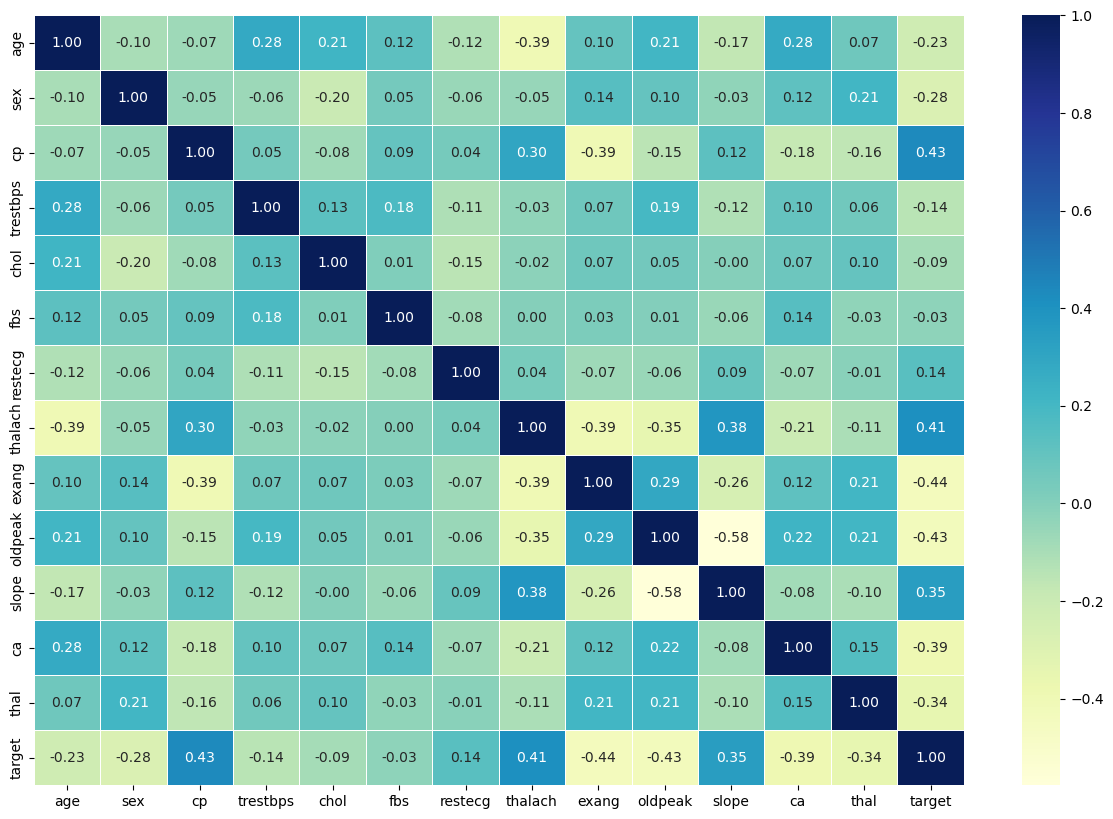

In [212]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

## Model Creation

In [215]:
# Everything except target variable is the independent variables
X = heart_disease_df.drop(labels="target", axis=1)

# Target variable
y = heart_disease_df.target.to_numpy()

In [217]:
y, type(y)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [219]:
np.random.seed(42)
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test

In [221]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [223]:
y_train, len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]),
 242)

In [225]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [227]:
y_test, len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]),
 61)

### Comparing the different models to choose the efficient one

In [230]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=100), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        
        model.fit(X_train, y_train)
        
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [232]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.639344262295082,
 'Logistic Regression': 0.8688524590163934,
 'Random Forest': 0.8524590163934426}

Comparing the model accuracy via a bar plot

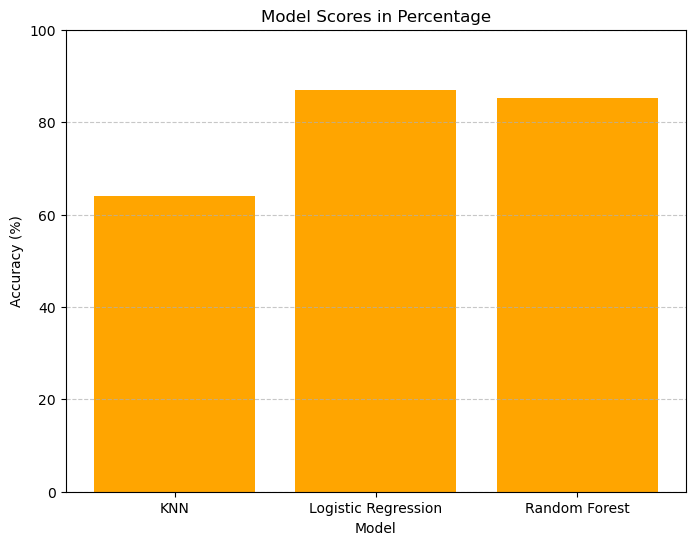

In [235]:
model_scores_percentage = {model: score * 100 for model, score in model_scores.items()}

plt.figure(figsize=(8, 6))
plt.bar(model_scores_percentage.keys(), model_scores_percentage.values(), color = "orange")
plt.title('Model Scores in Percentage')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limits to represent percentages
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the above graph it is observed that the Logistic Regression Model performs best results in classifying whether the person has heart disease or not

### Hyperparameter Tuning

### 1. KNN Neighbors

From the above models considered, we can tune the KNN algorithm to see if the performance can be improved

In [241]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [243]:
train_scores

[1.0,
 0.8099173553719008,
 0.7892561983471075,
 0.7520661157024794,
 0.768595041322314,
 0.7603305785123967,
 0.7355371900826446,
 0.7231404958677686,
 0.7107438016528925,
 0.6983471074380165,
 0.7272727272727273,
 0.6942148760330579,
 0.6900826446280992,
 0.6983471074380165,
 0.6859504132231405,
 0.6776859504132231,
 0.6859504132231405,
 0.6611570247933884,
 0.6735537190082644,
 0.6694214876033058]

Maximum KNN score on the test data: 72.13%


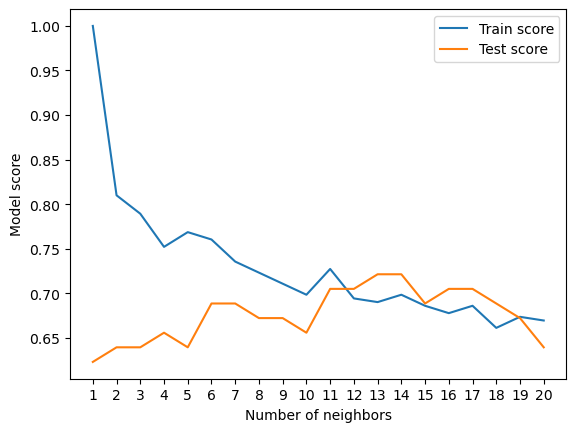

In [245]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, n_neighbors = 11 seems best.
Even knowing this, the KNN's model performance didn't get near what LogisticRegression or the RandomForestClassifier did.

### 2. Logistic Regression and RandomForestClassifier

Reading the Scikit-Learn documentation for LogisticRegression, we find there's a number of different hyperparameters we can tune. Tuning the hyperparameters for Logistic Regression and RandomForestClassifier 

**Tuning the Logistic Regression with RandomizedSearchCV**

In [251]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [253]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [255]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [257]:
rs_log_reg.score(X_test, y_test)

0.8360655737704918

**Tuning the Random Forest Classifier with RandomizedSearchCV**

In [260]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [262]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [263]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [264]:
rs_rf.score(X_test, y_test)

0.8688524590163934

Tuning the hyperparameters for each model saw a slight performance boost in both the RandomForestClassifier but a performance drop in Logistic Regression.

Tuning both the algorithms further with GridSearchCV.

**Tuning the Logistic Regression with GridSearchCV**

In [128]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [130]:
gs_log_reg.best_params_

{'C': 78.47599703514607, 'solver': 'liblinear'}

In [132]:
gs_log_reg.score(X_test, y_test)

0.8360655737704918

**Tuning the Random Forest Classifier with GridSearchCV**

In [272]:
rf_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grid,
                     cv=5,
                     verbose=2,
                     n_jobs=-1,)

gs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [274]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [276]:
gs_rf.score(X_test, y_test)

0.8524590163934426

On tuning the models futher with GridSearchCV, we see that performance has not boosted for Logistic Regression after tuning it with GridSearchCV. Whereas with RandomForestClassifier, the performance is better that the model prediction but less than the tuning done by RandomizedSearchCV

## Evaluating the model beyond the Accuracy parameter

### predict()

In [284]:
y_preds = rs_rf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [286]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

### 1. ROC Curve

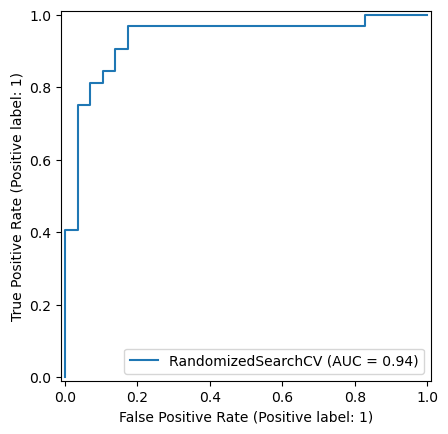

In [293]:
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=rs_rf, 
                               X=X_test, 
                               y=y_test); 

The model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5.

But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

### 2. Confusion Matrix

In [296]:
print(confusion_matrix(y_test, y_preds))

[[24  5]
 [ 3 29]]


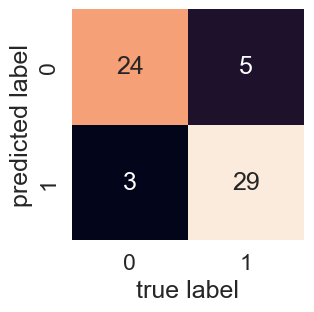

In [298]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

### 3. Classification Report

In [301]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



We'll take the best model along with the best hyperparameters and use cross_val_score() along with various scoring parameter values.

In [304]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [306]:
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(
    n_estimators=560,
    min_samples_split=12,
    min_samples_leaf=15,
    max_depth=3,
    random_state=42  # Set a random state for reproducibility
)

In [308]:
cv_acc = cross_val_score(rf_clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.85245902, 0.86885246, 0.85245902, 0.88333333, 0.75      ])

The output from cross_val_score() shows 5 different metrics across different splits of the data.

This goes to show the power of cross-validation.

If we had have only chosen to go with the results of one data split, we might be thinking our model is under performing or over performing.

Since there are 5 metrics here, we'll take the average.

In [311]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8414207650273223

Now we'll do the same for other classification metrics.

In [314]:
cv_precision = np.mean(cross_val_score(rf_clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8273969236817533

In [316]:
cv_recall = np.mean(cross_val_score(rf_clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.8969696969696971

In [318]:
cv_f1 = np.mean(cross_val_score(rf_clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8604846879754178

**Visualizing cross validated metrics**

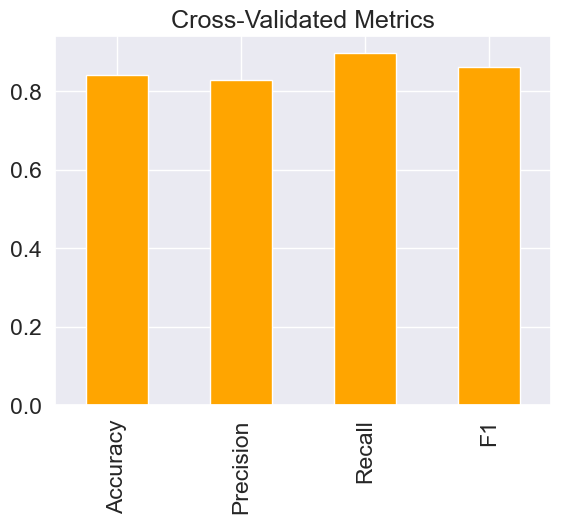

In [321]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False, color = "orange");

## Feature Importance

In [324]:
rf_clf.fit(X_train, y_train);

In [328]:
rf_clf.feature_importances_

array([0.04540308, 0.03587852, 0.15140369, 0.00906777, 0.01562111,
       0.        , 0.00655675, 0.09401262, 0.11955371, 0.13603882,
       0.06796   , 0.17369914, 0.14480479])

In [336]:
features_dict = dict(zip(heart_disease_df.columns, rf_clf.feature_importances_))
features_dict

{'age': 0.0454030838985919,
 'sex': 0.03587852205249758,
 'cp': 0.15140368563429382,
 'trestbps': 0.009067768233255856,
 'chol': 0.015621105993067503,
 'fbs': 0.0,
 'restecg': 0.006556745919885798,
 'thalach': 0.09401261940200552,
 'exang': 0.11955371456699541,
 'oldpeak': 0.13603881843139962,
 'slope': 0.06796000100439654,
 'ca': 0.17369914302899078,
 'thal': 0.1448047918346196}

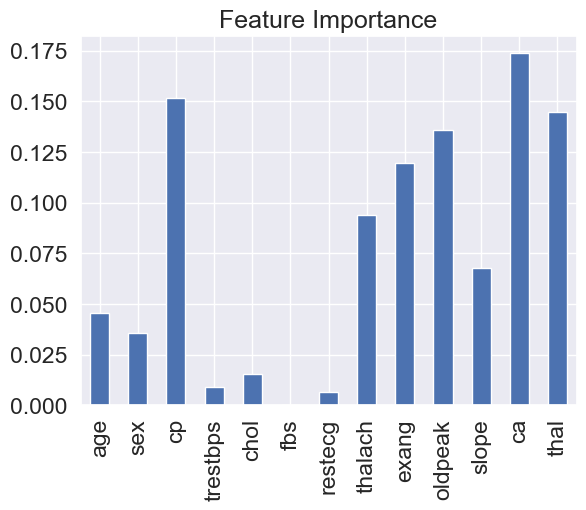

In [338]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

The larger the value (bigger bar), the more the feature contributes to the models decision.